# Menyelesaikan masalah Customer Behaviour di Perusahaan Retail

**Find Question:**

Bagaimana melakukan pengelompokan konsumen berdasarkan kemiripan karakteristik konsumen?


# Segmentasi Pelanggan 

Segmentasi pelanggan adalah proses memeriksa atribut pelanggan dan membuat kelompok berdasarkan bagaimana mereka berperilaku, siapa mereka, dan karakteristik khusus mereka. Segmentasi pelanggan memungkinkan bisnis menggunakan perpesanan yang ditargetkan, daripada mengambil pendekatan satu ukuran untuk semua, untuk mendorong hasil bisnis.

Misalnya, perusahaan yang menjual layanan streaming musik dapat mengelompokkan basis pelanggannya menurut genre yang didengarkan pelanggan, waktu yang biasanya mereka dengarkan, dan perangkat yang mereka gunakan untuk streaming musik. Perusahaan kemudian dapat menggunakan wawasan untuk menarik lebih banyak pecinta musik yang cocok dengan karakteristik tersebut.

Jenis Segmentasi Pasar & Contoh Segmentasi

1. Segmentasi demografis
2. Segmentasi geografis
3. Segmentasi psikografis
4. Segmentasi teknologi
5. Segmentasi perilaku
6. Segmentasi berdasarkan kebutuhan
7. Segmentasi berbasis nilai

Pendekatan lain untuk segmentasi pelanggan
1. Analisis Cohort
2. Kekinian, Frekuensi, Moneter
3. Pembelajaran Mesin

# K Means Clustering

K-means (MacQueen, 1967) adalah salah satu algoritma pembelajaran tanpa pengawasan paling sederhana yang memecahkan masalah pengelompokan yang terkenal. Prosedur ini mengikuti cara yang sederhana dan mudah untuk mengklasifikasikan kumpulan data yang diberikan melalui sejumlah klaster tertentu (asumsikan k klaster) tetap secara apriori. Ide utamanya adalah mendefinisikan k centroid, satu untuk setiap cluster. Centroid ini harus ditempatkan dengan cara yang cerdik karena lokasi yang berbeda menyebabkan hasil yang berbeda. Jadi, pilihan yang lebih baik adalah menempatkan mereka sejauh mungkin dari satu sama lain. Langkah selanjutnya adalah mengambil setiap titik milik kumpulan data yang diberikan dan mengaitkannya ke centroid terdekat. Ketika tidak ada poin yang tertunda, langkah pertama selesai dan pengelompokan awal dilakukan. Pada titik ini kita perlu menghitung ulang k centroid baru sebagai barycenter dari cluster yang dihasilkan dari langkah sebelumnya. Setelah kita memiliki k centroid baru ini, pengikatan baru harus dilakukan antara titik set data yang sama dan centroid baru terdekat. Sebuah loop telah dibuat. Sebagai hasil dari loop ini kita dapat melihat bahwa k centroid mengubah lokasinya langkah demi langkah sampai tidak ada lagi perubahan yang dilakukan. Dengan kata lain centroid tidak bergerak lagi.
Terakhir, algoritma ini bertujuan untuk meminimalkan fungsi objektif, dalam hal ini fungsi kesalahan kuadrat. 

Fungsi objektif

$$J=\sum \limits_{j=1} ^{k} \sum \limits_{i=1} ^{n} \begin{Vmatrix} x_{i} ^{(j)} - c_{j}\end{Vmatrix} ^{2} $$

yang mana $ \begin{Vmatrix} x_{i} ^{(j)} - c_{j}\end{Vmatrix} ^{2} $ adalah jarak antara titik-titik data  $  x_{i} ^{(j)} $ dan pusat klaster $c_{j}$, adalah indikator jarak n titik data dari pusat cluster masing-masing.

## Algoritma Pengelompokan K-Means

1. Tentukan parameter k
2. Tentukan pusat cluster awal secara acak
3. Hitung jarak setiap data ke pusat cluster
4. Tetapkan cluster data berdasarkan pusat cluster terdekat
5. Memperbarui pusat cluster dengan menghitung nilai rata-rata setiap cluster
6. Ulangi langkah 3-5 sampai kriteria berhenti terpenuhi:
     1. Jumlah iterasi tertentu tercapai, ATAU
     2. Tidak ada (atau minimal) perbedaan anggota cluster pada dua iterasi terakhir, OR
     3. Tidak ada (atau minimum) perbedaan pusat cluster, ATAU
     4. Selisih SSE (Sum of Squared Error) minimum

![](http://shabal.in/visuals/kmeans/left.gif)

## K Means Example

**0. Dataset**

| $$x_1$$ | $$x_2$$ |
| :---: | :---: |
|   1   |   1   |
|   2   |   3   |
|   7   |   8   |
|   8   |   8   |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.DataFrame({"x1":[1,2,7,8], "x2":[1,3,8,8]})
data

,x1,x2
0,1,1
1,2,3
2,7,8
3,8,8


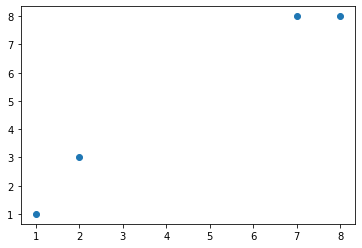

In [3]:
plt.scatter(data.x1, data.x2)

**1. Tentukan parameter $k$**

$$k=2$$

In [4]:
k=2

**2. Tentukan pusat cluster awal secara acak**

|Centroid | $$x_1$$ | $$x_2$$ |
| :---:   | :---: | :---: |
| $$c_1$$ |   1   |   1   |
| $$c_2$$ |   2   |   3   |

In [5]:
pusat_klaster = np.array([[1,1],[2,3]])
pusat_klaster

array([[1, 1],
       [2, 3]])

In [6]:
# Tentukan pusat cluster awal secara acak
import random
def pusat_klaster_awal(k, data):
    X=np.array(data)
    n=len(X)
    list_1=np.arange(0,n)
    pusat_klaster_index = random.choices(list_1, k=k)
    pusat_klaster=X[pusat_klaster_index]
    return pusat_klaster

**3. Hitung jarak setiap data ke pusat cluster**

In [7]:
# Mendefinisikan fungsi jarak Euclidean
def jarak_euclidean(x,y):
    return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))

In [8]:
def jarak_centroid_euclidean(data,pusat_klaster):
    n=len(data)
    k=np.array(pusat_klaster).shape[0]
    jarak=[]
    for i in range(n):
        x = list(data.iloc[i,::])
        jrk = [jarak_euclidean(x, pusat_klaster[j]) for j in range(k)]
        jarak.append(jrk)
    return jarak

In [9]:
jarak_centroid=jarak_centroid_euclidean(data,pusat_klaster)
jarak_centroid

[[0.0, 2.23606797749979],
 [2.23606797749979, 0.0],
 [9.219544457292887, 7.0710678118654755],
 [9.899494936611665, 7.810249675906654]]

**4. Tetapkan cluster data berdasarkan pusat cluster terdekat**

In [10]:
def menentukan_klaster(jarak_centroid):
    n=len(jarak_centroid)
    label_klaster=list()
    for i in range(n):
        max_val, idx = min((val, idx) for (idx, val) in enumerate(jarak_centroid[i]))
        label_klaster.append(idx)
    return label_klaster

In [11]:
klaster=menentukan_klaster(jarak_centroid)
klaster

[0, 1, 1, 1]

**5. Memperbarui pusat cluster dengan menghitung nilai rata-rata setiap cluster**

In [12]:
def menghitung_pusat_klaster(data, klaster):
    data['label']=klaster
    pusat_barudf=data.groupby('label', as_index=False).mean()
    pusat_barudf=pusat_barudf.iloc[::,1:]
    pusat_klaster_baru=np.array(pusat_barudf)
    return pusat_klaster_baru

In [13]:
pusat_klaster_baru=menghitung_pusat_klaster(data, klaster)
pusat_klaster_baru

array([[1.        , 1.        ],
       [5.66666667, 6.33333333]])

**6. Ulangi langkah 3-5 sampai kriteria berhenti terpenuhi:**

In [14]:
def perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru):
    perubahan = 0
    for a,b in zip(pusat_klaster_lama, pusat_klaster_baru):
        perubahan+=jarak_euclidean(a,b)
    return perubahan

In [15]:
perubahan_pusat_klaster_euclidean(pusat_klaster, pusat_klaster_baru)

4.955356249106169

## K Means Function

In [16]:
def plot_klaster(X, klaster, pusat_klaster):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=klaster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(pusat_klaster[:, 0], pusat_klaster[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

In [19]:
def k_means(k, df):
    X=np.array(df)
    pusat_klaster_lama = pusat_klaster_awal(k, X)
    klaster = [0]*len(X)
    epsilon = 100
    iterasi = -1
    while epsilon>.001:
        jarak_ke_pusat_klaster=jarak_centroid_euclidean(df,pusat_klaster_lama)
        klaster = menentukan_klaster(jarak_ke_pusat_klaster)
        plot_klaster(X, klaster, pusat_klaster_lama)
        pusat_klaster_baru = menghitung_pusat_klaster(df, klaster)
        epsilon = perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru)
        pusat_klaster_lama = pusat_klaster_baru
        iterasi += 1
    return iterasi, klaster, pusat_klaster_baru

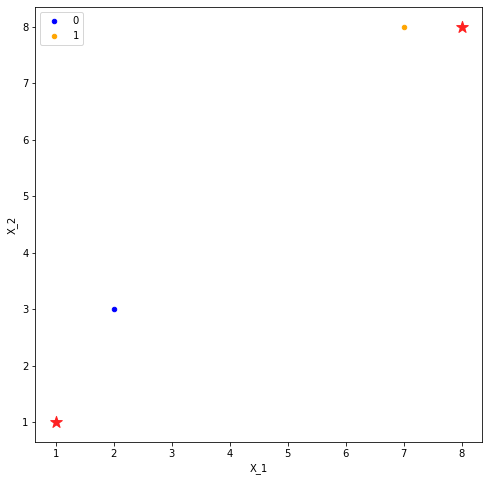

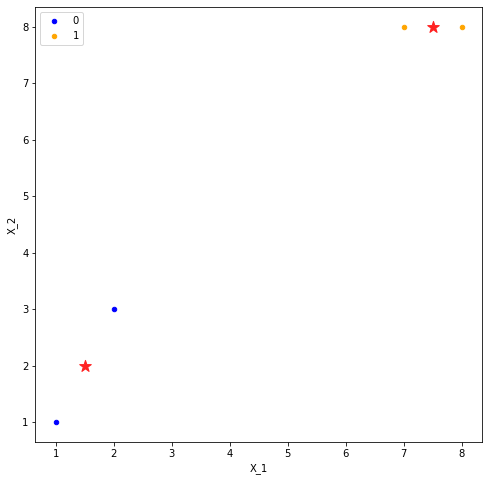

In [20]:
iterasi, klaster, pusat_klaster= k_means(2, data)

## K-Means Clustering using Python Scikit Learn

In [22]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array(data.iloc[:,:2])

In [23]:
X

array([[1, 1],
       [2, 3],
       [7, 8],
       [8, 8]])

In [24]:
kmeans = KMeans(n_clusters=2, random_state=3).fit(X)

In [25]:
kmeans.labels_

array([1, 1, 0, 0], dtype=int32)

In [26]:
kmeans = KMeans(n_clusters=2, random_state=3).fit(X)

In [27]:
kmeans.labels_

array([1, 1, 0, 0], dtype=int32)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
kmeans.labels_

array([0, 0, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[1.5, 2. ],
       [7.5, 8. ]])

## Live Exercise Coding Activity 1: K Means Clustering 

Given Dataset

In [ ]:
data=pd.DataFrame({"Customer ID":["001", "002", "003", "004", "005", "006"], 
                   "Annual Income":[1231, 1452, 789, 201, 78, 45], 
                   "Spending Score":[9, 8, 8, 2, 1, 6]})
data

,Customer ID,Annual Income,Spending Score
0,001,1231,9
1,002,1452,8
2,003,789,8
3,004,201,2
4,005,78,1
5,006,45,6


In [ ]:
# Name               :
# University         :
# Major              :
# Student Number     :

In [ ]:
# Cluster the dataset above using K Means clustering into 2 cluster.


## K Means Clustering menggunakan Data Konsumen

### Library Import

We need to import some basic library and library contain clustering function

In [28]:
import pandas as pd                                                              
import numpy as np                                                               

import matplotlib.pyplot as plt                                                  
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer                                 

from sklearn.cluster import KMeans                                                            

### Data Load

Dalam contoh pertama ini kita akan menggunakan dataset Pelanggan Mall yang berisi ID Pelanggan, Jenis Kelamin, Usia, Pendapatan Tahunan dan Skor Pengeluaran. Dua variabel terakhir akan digunakan untuk clustering untuk mendapatkan segmen pelanggan.

Data Source:https://www.kaggle.com/shwetabh123/mall-customers?select=Mall_Customers.csv

In [30]:
# Load dataframe from csv data and show the first five rows of the data
df = pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/NSC2022/main/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
# Dapatkan informasi lengkap data untuk memeriksa tipe data dan data yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Tidak ada data yang hilang atau tipe data yang salah untuk langkah selanjutnya.

### Data Preparation

Kita perlu menyiapkan data untuk pemodelan K Means Clustering, pertama kita hanya perlu mengambil Skor Pendapatan dan Pengeluaran Tahunan sebagai variabel matriks X.

In [32]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
X = np.array(df[['Annual Income (k$)','Spending Score (1-100)']])
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Jumlah Cluster Rekomendasi menggunakan Metode Elbow

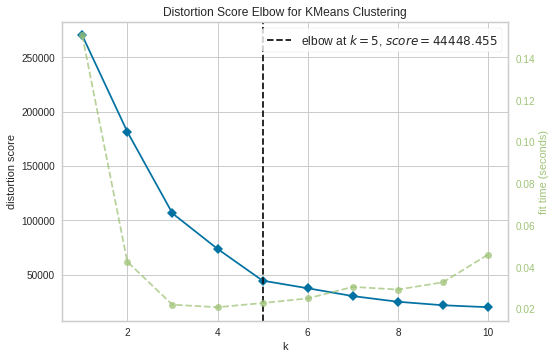

In [34]:
model = KMeans()                                               
visualizer = KElbowVisualizer(model, k=(1, 11))                
visualizer.fit(X)                                             
visualizer.show()                                             
plt.show()

Berdasarkan visualisasi tersebut kami mendapatkan rekomendasi untuk membuat lima cluster

### Melatih model K Means Clustering

In [35]:
km_model = KMeans(n_clusters=5, random_state=10)              
cluster_result = km_model.fit_predict(X)                      
centroids = km_model.cluster_centers_                        
labels = km_model.labels_                                     

Kita dapat menyimpan cluster label sebagai kolom baru pada tabel di bawah ini

In [36]:
df_cluster = pd.DataFrame(X, columns=['Annual Income (k$)','Spending Score (1-100)'])
df_cluster['cluster'] = labels
df_cluster.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


### Visualisasi Hasil Pengklasteran

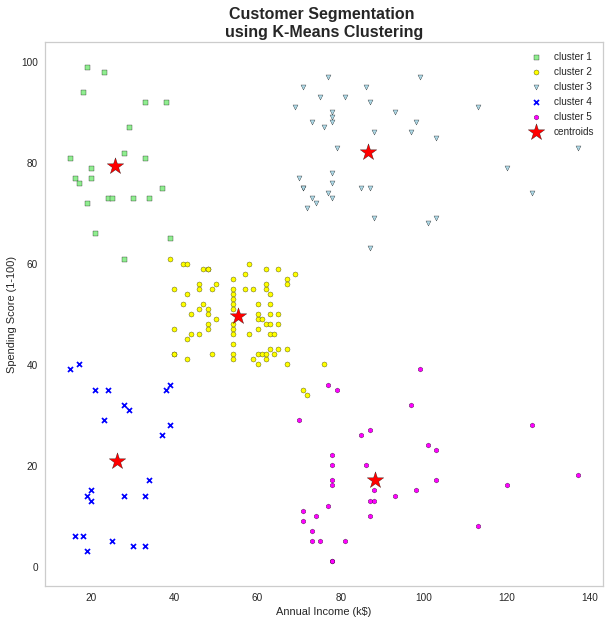

In [37]:
# create matplotlib figure and axes object
fig, ax=plt.subplots(figsize=(10,10))

# visualise cluster
ax.scatter(
    df_cluster[df_cluster.cluster==0]['Annual Income (k$)'], df_cluster[df_cluster.cluster==0]['Spending Score (1-100)'],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    df_cluster[df_cluster.cluster==1]['Annual Income (k$)'], df_cluster[df_cluster.cluster==1]['Spending Score (1-100)'],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

ax.scatter(
    df_cluster[df_cluster.cluster==2]['Annual Income (k$)'], df_cluster[df_cluster.cluster==2]['Spending Score (1-100)'],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

ax.scatter(
    df_cluster[df_cluster.cluster==3]['Annual Income (k$)'], df_cluster[df_cluster.cluster==3]['Spending Score (1-100)'],
    s=25, c='blue',
    marker='x', edgecolor='black',
    label='cluster 4'
)

ax.scatter(
    df_cluster[df_cluster.cluster==4]['Annual Income (k$)'], df_cluster[df_cluster.cluster==4]['Spending Score (1-100)'],
    s=25, c='magenta',
    marker='h', edgecolor='black',
    label='cluster 5'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("Customer Segmentation \nusing K-Means Clustering", fontweight="bold", fontsize=16)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(scatterpoints=1, loc='best')
plt.grid()
plt.show()

### Evaluasi Hasil Klaster

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [38]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [39]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [40]:
dbi_index = davies_bouldin_score(X, labels)

In [41]:
dbi_index

0.5725628995597086

The cluster result is good enough

### Penjelasan Hasil Klaster

Kami kembali ke visualisasi cluster kami untuk mencoba memahami karakteristik setiap cluster

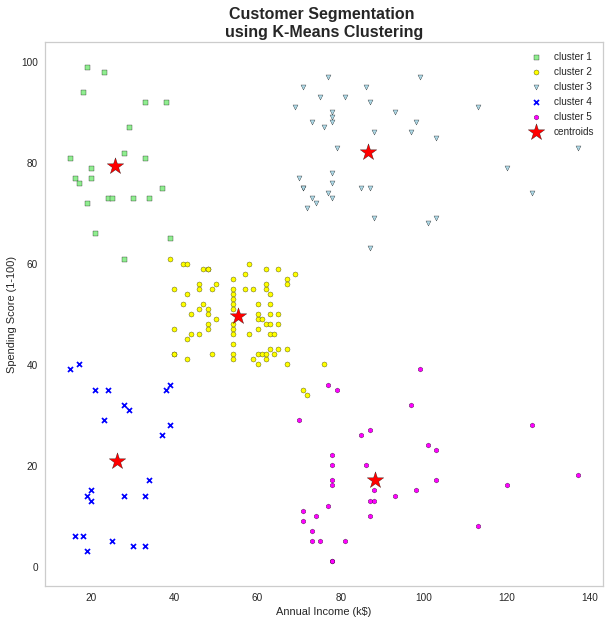

In [42]:
# create matplotlib figure and axes object
fig, ax=plt.subplots(figsize=(10,10))

# visualise cluster
ax.scatter(
    df_cluster[df_cluster.cluster==0]['Annual Income (k$)'], df_cluster[df_cluster.cluster==0]['Spending Score (1-100)'],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    df_cluster[df_cluster.cluster==1]['Annual Income (k$)'], df_cluster[df_cluster.cluster==1]['Spending Score (1-100)'],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

ax.scatter(
    df_cluster[df_cluster.cluster==2]['Annual Income (k$)'], df_cluster[df_cluster.cluster==2]['Spending Score (1-100)'],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

ax.scatter(
    df_cluster[df_cluster.cluster==3]['Annual Income (k$)'], df_cluster[df_cluster.cluster==3]['Spending Score (1-100)'],
    s=25, c='blue',
    marker='x', edgecolor='black',
    label='cluster 4'
)

ax.scatter(
    df_cluster[df_cluster.cluster==4]['Annual Income (k$)'], df_cluster[df_cluster.cluster==4]['Spending Score (1-100)'],
    s=25, c='magenta',
    marker='h', edgecolor='black',
    label='cluster 5'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("Customer Segmentation \nusing K-Means Clustering", fontweight="bold", fontsize=16)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(scatterpoints=1, loc='best')
plt.grid()
plt.show()

In [ ]:
df_cluster

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


In [ ]:
df_cluster['cluster'] = df_cluster['cluster']+1

In [ ]:
df_cluster['Annual Income (k$)']

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [ ]:
df_annual_income = df_cluster.groupby(df_cluster['cluster'])[['Annual Income (k$)']].mean().reset_index(drop=False)
df_annual_income.columns = ['cluster','Average Annual Income (k$)']
df_annual_income 

,cluster,Average Annual Income (k$)
0,1,25.727273
1,2,55.296296
2,3,86.538462
3,4,26.304348
4,5,88.200000


In [ ]:
df_avg_annual_income = df_cluster.groupby(df_cluster['cluster'])[['Annual Income (k$)']].mean().reset_index(drop=False).sort_values('cluster')
df_avg_annual_income.columns = ['cluster','Average Annual Income (k$)']

df_min_annual_income = df_cluster.groupby(df_cluster['cluster'])[['Annual Income (k$)']].min().reset_index(drop=False).sort_values('cluster')
df_min_annual_income.columns = ['cluster','Min Annual Income (k$)']

df_max_annual_income = df_cluster.groupby(df_cluster['cluster'])[['Annual Income (k$)']].max().reset_index(drop=False).sort_values('cluster')
df_max_annual_income.columns = ['cluster','Max Annual Income (k$)']

df_annual_income = pd.DataFrame({"cluster":df_avg_annual_income["cluster"],
                                 "mean":df_avg_annual_income["Average Annual Income (k$)"],
                                 "min":df_min_annual_income["Min Annual Income (k$)"],
                                 "max":df_max_annual_income["Max Annual Income (k$)"]})

df_annual_income

,cluster,mean,min,max
0,1,25.727273,15,39
1,2,55.296296,39,76
2,3,86.538462,69,137
3,4,26.304348,15,39
4,5,88.200000,70,137


In [ ]:
df_avg_spending_score = df_cluster.groupby(df_cluster['cluster'])[['Spending Score (1-100)']].mean().reset_index(drop=False).sort_values('cluster')
df_avg_spending_score.columns = ['cluster','Average Spending Score (1-100)']

df_min_spending_score = df_cluster.groupby(df_cluster['cluster'])[['Spending Score (1-100)']].min().reset_index(drop=False).sort_values('cluster')
df_min_spending_score.columns = ['cluster','Min Spending Score (1-100)']

df_max_spending_score = df_cluster.groupby(df_cluster['cluster'])[['Spending Score (1-100)']].max().reset_index(drop=False).sort_values('cluster')
df_max_spending_score.columns = ['cluster','Max Spending Score (1-100)']

df_spending_score = pd.DataFrame({"cluster":df_avg_annual_income["cluster"],
                                 "mean":df_avg_spending_score["Average Spending Score (1-100)"],
                                 "min":df_min_spending_score["Min Spending Score (1-100)"],
                                 "max":df_max_spending_score["Max Spending Score (1-100)"]})

df_spending_score

,cluster,mean,min,max
0,1,79.363636,61,99
1,2,49.518519,34,61
2,3,82.128205,63,97
3,4,20.913043,3,40
4,5,17.114286,1,39


Penjelasan Klaster:


1. Klaster 1: **Pendapatan Tahunan Rendah** dengan rata-rata 25,27 antara 15 - 39 kilo USD dan **Skor Pengeluaran Tinggi** dengan rata-rata 79,36 antara 61 - 99
2. Klaster 2: **Pendapatan Tahunan Menengah** dengan rata-rata 55,29 antara 39 - 76 kilo USD dan **Skor Pengeluaran Menengah** dengan rata-rata 49,51 antara 34 - 61
3. Klaster 3: **Pendapatan Tahunan Tinggi** dengan rata-rata 86,53 antara 69 - 137 kilo USD dan **Skor Pengeluaran Tinggi** dengan rata-rata 82,12 antara 63 - 97
4. Klaster 4: **Pendapatan Tahunan Rendah** dengan rata-rata 26,30 antara 15 - 39 kilo USD dan **Skor Pengeluaran Rendah** dengan rata-rata 20 antara 3 - 40
5. Klaster 5: **Pendapatan Tahunan Tinggi** dengan rata-rata 88,20 antara 70 - 137 kilo USD dan **Skor Pengeluaran Rendah** dengan rata-rata 17 antara 1 - 39

# K Means Clustering for Customer Segmentations using RFM Analysis

Analisis RFM memberi peringkat setiap pelanggan pada faktor-faktor berikut:

1. **Recency.** Seberapa baru pembelian terakhir pelanggan? Pelanggan yang baru saja melakukan pembelian akan tetap memikirkan produk tersebut dan kemungkinan besar akan membeli atau menggunakan produk tersebut lagi. Bisnis sering mengukur keterkinian dalam hitungan hari. Tetapi, tergantung pada produknya, mereka dapat mengukurnya dalam tahun, minggu, atau bahkan jam.

2. **Frekuensi.** Seberapa sering pelanggan ini melakukan pembelian dalam periode tertentu? Pelanggan yang membeli sekali seringkali lebih mungkin untuk membeli lagi. Selain itu, pelanggan pertama kali mungkin menjadi target yang baik untuk iklan tindak lanjut untuk mengubah mereka menjadi pelanggan yang lebih sering.

3. **Monetary.** Berapa banyak uang yang dibelanjakan pelanggan dalam periode tertentu? Pelanggan yang menghabiskan banyak uang lebih cenderung menghabiskan uang di masa depan dan memiliki nilai tinggi untuk bisnis.

### Data Load

In [43]:
#Import Online Retail Data containing transactions
Rtl_data = pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/NSC2022/main/online_retail_data.csv')
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
Rtl_data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
50453,544161,21755,LOVE BUILDING BLOCK WORD,3.0,2011-02-16 12:59:00,5.95,16875.0,United Kingdom,17.85
3594,536841,22766,PHOTO FRAME CORNICE,8.0,2010-02-12 18:27:00,2.95,16150.0,United Kingdom,23.60
18197,538855,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,6.0,2010-12-14 13:50:00,2.55,16503.0,United Kingdom,15.30
46143,543397,16011,ANIMAL STICKERS,24.0,2011-08-02 10:32:00,0.21,17859.0,United Kingdom,5.04
39995,542538,22937,BAKING MOULD CHOCOLATE CUPCAKES,6.0,2011-01-28 13:54:00,2.55,15079.0,United Kingdom,15.30
16187,538625,21811,CHRISTMAS HANGING HEART WITH BELL,48.0,2010-12-13 12:50:00,1.25,14544.0,United Kingdom,60.00
38995,542373,21224,SET/4 SKULL BADGES,20.0,2011-01-27 13:38:00,1.25,16767.0,United Kingdom,25.00
3672,536846,22424,ENAMEL BREAD BIN CREAM,1.0,2010-02-12 19:59:00,12.75,14573.0,United Kingdom,12.75
55895,544824,22629,SPACEBOY LUNCH BOX,12.0,2011-02-24 09:32:00,1.95,17139.0,United Kingdom,23.40
4154,536956,21533,RETROSPOT LARGE MILK JUG,3.0,2010-03-12 12:43:00,4.95,14210.0,United Kingdom,14.85


### Data Exploration 

In [ ]:
#Check the shape (number of columns and rows) in the dataset
Rtl_data.shape

(59165, 9)

In [ ]:
#Check for missing values in the dataset
Rtl_data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [ ]:
Rtl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59165 entries, 0 to 59164
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    59165 non-null  int64  
 1   StockCode    59165 non-null  object 
 2   Description  59165 non-null  object 
 3   Quantity     59165 non-null  float64
 4   InvoiceDate  59165 non-null  object 
 5   UnitPrice    59165 non-null  float64
 6   CustomerID   59165 non-null  float64
 7   Country      59165 non-null  object 
 8   TotalAmount  59165 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 4.5+ MB


In [ ]:
#Convert the string date field to datetime
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [ ]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['UnitPrice']

In [ ]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
Rtl_data.shape

(59165, 9)

In [ ]:
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
Rtl_data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalAmount
count,59165.000000,59165.000000,59165.000000,59165.000000,59165.000000
mean,540812.242136,12.654390,3.103471,15634.933745,21.712323
std,2678.574214,308.951084,5.018970,1629.298806,327.254160
min,536365.000000,1.000000,0.000000,12346.000000,0.000000
25%,538378.000000,2.000000,1.250000,14298.000000,4.250000
50%,540839.000000,4.000000,1.950000,15579.000000,10.500000
75%,543166.000000,12.000000,3.750000,17180.000000,17.700000
max,545214.000000,74215.000000,295.000000,18283.000000,77183.600000


### Calculate RFM

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = Rtl_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                'InvoiceNo': lambda x: len(x), 
                                                'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,323,20,1009.31
2,12748.0,222,789,5014.32
3,12820.0,326,11,170.46
4,12823.0,289,2,535.50


### RFM Exploration

In [ ]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    1511.000000
mean      304.529451
std       153.269789
min         8.000000
25%       251.000000
50%       299.000000
75%       357.000000
max       696.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


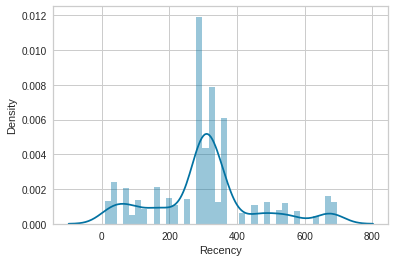

In [ ]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    1511.000000
mean       39.156188
std        56.275747
min         1.000000
25%        11.000000
50%        23.000000
75%        49.000000
max       789.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


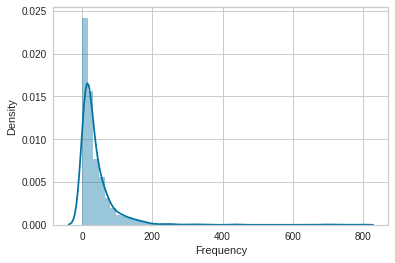

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count     1511.000000
mean       850.171807
std       2740.544772
min          0.850000
25%        203.960000
50%        371.390000
75%        757.655000
max      77183.600000
Name: Monetary, dtype: float64

### RFM Score & Label

In [ ]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 251.0, 0.5: 299.0, 0.75: 357.0},
 'Frequency': {0.25: 11.0, 0.5: 23.0, 0.75: 49.0},
 'Monetary': {0.25: 203.95999999999998,
  0.5: 371.39000000000004,
  0.75: 757.655}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,3,4,1
12747.0,323,20,1009.31,3,3,1
12748.0,222,789,5014.32,1,1,1
12820.0,326,11,170.46,3,4,4
12823.0,289,2,535.50,2,4,2


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,3,4,1,341,8
12747.0,323,20,1009.31,3,3,1,331,7
12748.0,222,789,5014.32,1,1,1,111,3
12820.0,326,11,170.46,3,4,4,344,11
12823.0,289,2,535.50,2,4,2,242,8


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,3,4,1,341,8,Gold
1,12747.0,323,20,1009.31,3,3,1,331,7,Gold
2,12748.0,222,789,5014.32,1,1,1,111,3,Platinum
3,12820.0,326,11,170.46,3,4,4,344,11,Bronze
4,12823.0,289,2,535.50,2,4,2,242,8,Gold


In [ ]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,15061.0,8,168,22615.17,1,1,1,111,3,Platinum
1,17450.0,38,74,20649.04,1,1,1,111,3,Platinum
2,16029.0,37,57,19452.27,1,1,1,111,3,Platinum
3,17511.0,222,214,18356.86,1,1,1,111,3,Platinum
4,13089.0,191,438,15487.00,1,1,1,111,3,Platinum
5,15311.0,8,684,12848.30,1,1,1,111,3,Platinum
6,14298.0,161,342,11159.22,1,1,1,111,3,Platinum
7,13798.0,38,94,10761.40,1,1,1,111,3,Platinum
8,13694.0,222,130,10560.16,1,1,1,111,3,Platinum
9,14680.0,191,95,8284.12,1,1,1,111,3,Platinum


### Data Preparation for Clustering

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



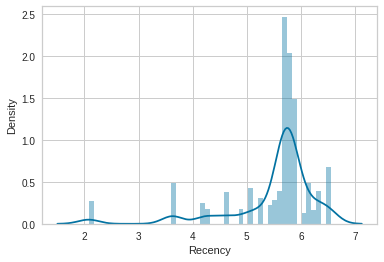

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



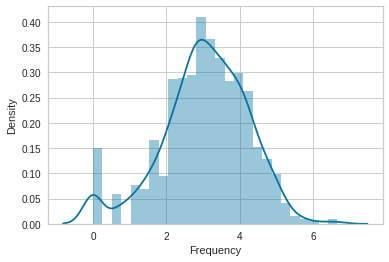

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



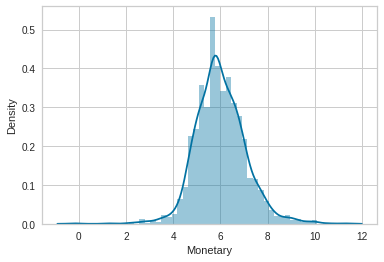

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

In [ ]:
Scaled_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0.339232,-2.600133,4.948401
12747.0,0.332017,-0.053930,0.855307
12748.0,-0.118932,3.069334,2.368157
12820.0,0.342839,-0.562151,-0.822702
12823.0,0.197333,-2.011175,0.256962
...,...,...,...
18257.0,0.202144,-0.243450,-0.107330
18259.0,0.817839,-0.946291,-0.076186
18260.0,-1.090576,0.468739,0.621254


### Jumlah Cluster Rekomendasi

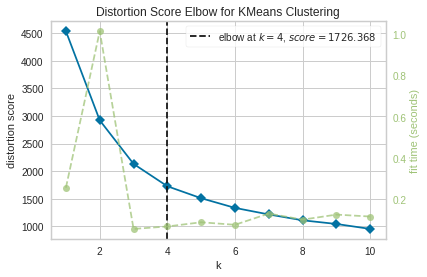

In [ ]:
model = KMeans()                                               # Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(1, 11))                # Check the distortion/average distance in cluster if we create 1 to 11 group
visualizer.fit(Scaled_Data)                                    # Fit the data to the visualizer
visualizer.show()                                              # Finalize and render the figure
plt.show()

### Melatih model K Means Clustering

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Label_Cluster
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,3,4,1,341,8,Gold,2,Cluster 1
12747.0,323,20,1009.31,3,3,1,331,7,Gold,2,Cluster 1
12748.0,222,789,5014.32,1,1,1,111,3,Platinum,2,Cluster 1
12820.0,326,11,170.46,3,4,4,344,11,Bronze,3,Cluster 3
12823.0,289,2,535.50,2,4,2,242,8,Gold,0,Cluster 4


In [ ]:
Label_Cluster = {0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4"}
RFMScores['Label_Cluster'] = RFMScores['Cluster'].map(Label_Cluster)

### Visualisasi Hasil Cluster

In [ ]:
import plotly.express as px
fig = px.scatter_3d(RFMScores, x='Recency', y='Frequency', z='Monetary',
              color='Label_Cluster')
fig.show()

### Evaluasi Hasil Klaster

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [ ]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
Scaled_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0.339232,-2.600133,4.948401
12747.0,0.332017,-0.053930,0.855307
12748.0,-0.118932,3.069334,2.368157
12820.0,0.342839,-0.562151,-0.822702
12823.0,0.197333,-2.011175,0.256962
...,...,...,...
18257.0,0.202144,-0.243450,-0.107330
18259.0,0.817839,-0.946291,-0.076186
18260.0,-1.090576,0.468739,0.621254


In [ ]:
dbi_index1 = davies_bouldin_score(Scaled_Data, RFMScores['Label_Cluster'])

In [ ]:
dbi_index1

1.0166884820304407

In [ ]:
dbi_index2 = davies_bouldin_score(Scaled_Data, RFMScores['RFM_Loyalty_Level'])

In [ ]:
dbi_index2

1.9827656342501783